In [25]:
# import libraries

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator, image

from tensorflow.keras.models import load_model

import os,glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
import zipfile
local_zip = '../Downloads/train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('../Downloads')
zip_ref.close()

In [50]:
base_dir = '../Downloads'
train_dir = os.path.join(base_dir, 'train')
train_img_names = os.listdir(train_dir)

In [51]:
categories= list()
for image in train_img_names:
    category = image.split(".")[0]
    if category == "dog":
        categories.append("dogs")
    else:
        categories.append("cats")
df= pd.DataFrame({"Image":train_img_names, "Category": categories})

In [52]:
df["Category"].value_counts()

dogs    12500
cats    12500
Name: Category, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
train,validation= train_test_split(df, test_size=0.1)
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)

In [54]:
train["Category"].value_counts()

cats    11251
dogs    11249
Name: Category, dtype: int64

In [55]:
# Load Data
batch_size = 20

image_size=(150,150)

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train = train_datagen.flow_from_dataframe(train, directory=train_dir, x_col='Image', y_col='Category', 
                                          target_size=image_size, batch_size=batch_size,class_mode='binary')
validation = validation_datagen.flow_from_dataframe(validation, directory=train_dir, x_col='Image', y_col='Category', 
                                                    target_size=image_size, batch_size=batch_size,class_mode='binary')

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


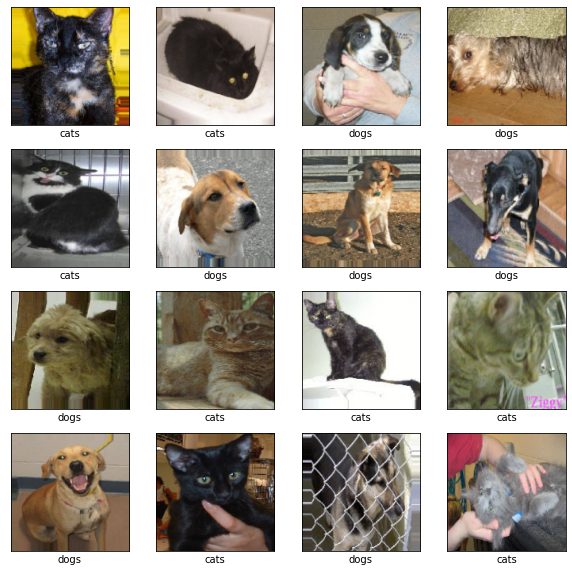

In [47]:
# Plot images
class_names = {v:k for k,v in train.class_indices.items()}
images,labels = next(iter(train))

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[labels[i][1]])

plt.show()

In [91]:
# Model 1: CNN
def classifier() : 
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=train.image_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    return(model)

In [92]:
model_CNN = classifier()
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
model_CNN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               22429824  
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 22,430,849
Trainable params: 22,430,849
Non-trainable params: 0
_________________________________________________________________


In [94]:
my_Model_CNN = model_CNN.fit(train,
                              validation_data=validation,
                              steps_per_epoch=train.n//100,
                              epochs=8,
                              validation_steps=validation.n//32,
                              verbose=1)

Epoch 1/8
225/225 [==============================] - 59s 253ms/step - loss: 1.2448 - accuracy: 0.5708 - val_loss: 0.6210 - val_accuracy: 0.6603
Epoch 2/8
225/225 [==============================] - 60s 265ms/step - loss: 0.6181 - accuracy: 0.6660 - val_loss: 0.6075 - val_accuracy: 0.6744
Epoch 3/8
225/225 [==============================] - 61s 271ms/step - loss: 0.6125 - accuracy: 0.6678 - val_loss: 0.5984 - val_accuracy: 0.6641
Epoch 4/8
225/225 [==============================] - 60s 268ms/step - loss: 0.5888 - accuracy: 0.6867 - val_loss: 0.5826 - val_accuracy: 0.7096
Epoch 5/8
225/225 [==============================] - 57s 252ms/step - loss: 0.5870 - accuracy: 0.6875 - val_loss: 0.5798 - val_accuracy: 0.6949
Epoch 6/8
225/225 [==============================] - 55s 243ms/step - loss: 0.5719 - accuracy: 0.7053 - val_loss: 0.5693 - val_accuracy: 0.7032
Epoch 7/8
225/225 [==============================] - 55s 242ms/step - loss: 0.5527 - accuracy: 0.7279 - val_loss: 0.5555 - val_accuracy:

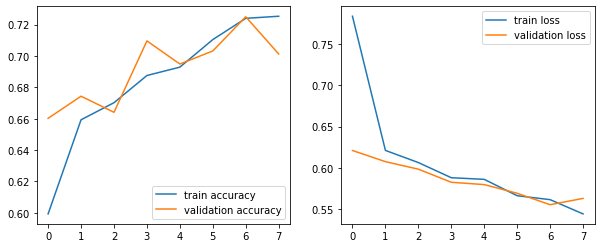

In [95]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(my_Model_CNN.history["accuracy"], label = "train accuracy")
plt.plot(my_Model_CNN.history["val_accuracy"], label = "validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(my_Model_CNN.history["loss"], label = "train loss")
plt.plot(my_Model_CNN.history["val_loss"], label = "validation loss")

plt.legend()
plt.show()

In [85]:
test_zip = '../Downloads/test1.zip'
zip_ref = zipfile.ZipFile(test_zip, 'r')
zip_ref.extractall('../Downloads')
zip_ref.close()

test_dir = '../Downloads/test1'
test_images = os.listdir(os.path.join(test_dir))

In [86]:
test_df = pd.DataFrame({'Image': test_images})
test_df

,Image
0,9733.jpg
1,63.jpg
2,6400.jpg
3,823.jpg
4,4217.jpg
...,...
12495,3561.jpg
12496,8434.jpg
12497,7707.jpg
12498,6419.jpg


In [87]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test = test_datagen.flow_from_dataframe(test_df, directory=test_dir, x_col='Image', y_col=None, 
                                          target_size=image_size, batch_size=batch_size,class_mode=None)

Found 12500 validated image filenames.


In [98]:
model_CNN.evaluate(validation)

125/125 [==============================] - 8s 67ms/step - loss: 0.5753 - accuracy: 0.6920


[0.5753021240234375, 0.6919999718666077]

In [105]:
predict = model_CNN.predict(test)
predict = np.where(predict > .5, "Dog", "Cat")

In [106]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [107]:
predict[1:10]

array([['Dog'],
       ['Dog'],
       ['Dog'],
       ['Cat'],
       ['Dog'],
       ['Dog'],
       ['Dog'],
       ['Cat'],
       ['Dog']], dtype='<U3')

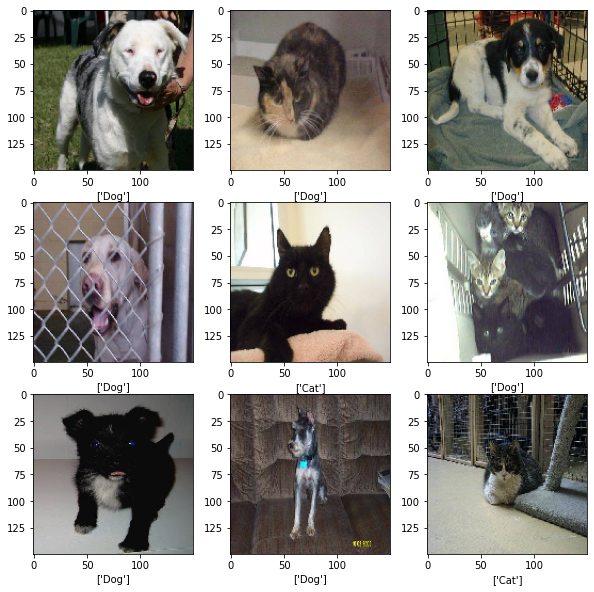

In [109]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test[0][i])
    plt.xlabel(predict[i])
plt.show()

In [110]:
def GetXY(gen):
    listX = []
    listY = []
    for i in range(gen.__len__()):
        gennext = gen.next()
        listX.append(gennext[0])
        listY.append(gennext[1])
    x=np.concatenate(listX)
    y=np.concatenate(listY)
    return (x,y)
valX, valY = GetXY(validation)

In [113]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predict = (model_CNN.predict(valX) > 0.5).astype("int32")
print(classification_report(valY,predict))

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66      1249
         1.0       0.66      0.79      0.72      1251

    accuracy                           0.69      2500
   macro avg       0.70      0.69      0.69      2500
weighted avg       0.70      0.69      0.69      2500



[['Dog']]


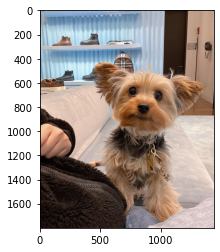

In [130]:
animal_img =  mpimg.imread('../Downloads/IMG_1031.JPG')
plt.imshow(animal_img)


img = cv2.imread('../Downloads/IMG_1031.JPG')

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

img = img/255.0

classes = model_CNN.predict(img)
classes = np.where(classes > .5, "Dog", "Cat")
print(classes)

[['Dog']]


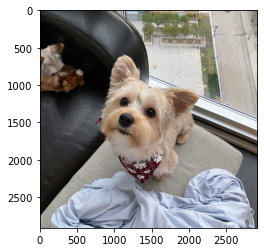

In [134]:
animal_img =  mpimg.imread('../Downloads/IMG_1032.JPG')
plt.imshow(animal_img)


img = cv2.imread('../Downloads/IMG_1032.JPG')

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

img = img/255.0

classes = model_CNN.predict(img)
classes = np.where(classes > .5, "Dog", "Cat")
print(classes)

[['Cat']]


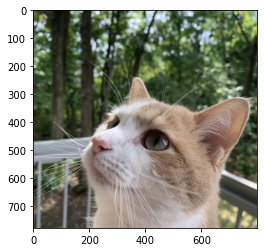

In [139]:
animal_img =  mpimg.imread('../Downloads/IMG_1033.JPG')
plt.imshow(animal_img)


img = cv2.imread('../Downloads/IMG_1033.JPG')

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

img = img/255.0

classes = model_CNN.predict(img)
classes = np.where(classes > .5, "Dog", "Cat")
print(classes)

[['Dog']]


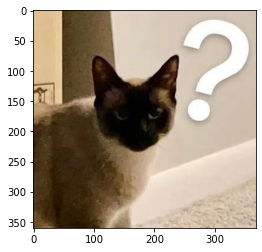

In [138]:
animal_img =  mpimg.imread('../Downloads/IMG_1034.JPG')
plt.imshow(animal_img)


img = cv2.imread('../Downloads/IMG_1034.JPG')

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

img = img/255.0

classes = model_CNN.predict(img)
classes = np.where(classes > .5, "Dog", "Cat")
print(classes)